# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**



# **Project Summary -**

The objective of this study is to forecast stock closing prices using regression models, specifically Linear Regression (OLS), Ridge Regression, and Random Forest. Here's a summary of the regression project:

1. **Data Preprocessing**: The dataset underwent cleaning procedures to address missing values, duplicates, and outliers. Standardization and normalization techniques were applied to ensure data consistency.

2. **Exploratory Data Analysis (EDA)**: During this phase, the data was visualized and analyzed to extract insights. Cleaning and preprocessing steps, such as handling missing values, duplicates, and outliers, were performed. Data visualization techniques were employed to identify patterns and trends.

3. **Feature Engineering**: New features like Year, Month, and Quarter were engineered to capture temporal patterns and enhance model accuracy.

4. **Splitting**: The dataset was split into training and testing sets to facilitate model implementation. The training set was used to train the models, while the testing set was utilized for evaluation.

5. **Model Implementation**: Regression models, including Linear Regression (OLS), Ridge Regression, and Random Forest, were implemented to predict stock prices. Model performance was evaluated using metrics like mean squared error (MSE) and R-squared. Cross-validation techniques were utilized to assess model performance on unseen data. The best-performing model was selected for production deployment based on comprehensive evaluation.

6. **Model Explainability**: Models were analyzed to interpret the factors influencing stock price predictions. Techniques like Permutation Importance Scores were used to assess feature importance and elucidate the relationship between features and predicted values.

In summary, this project successfully utilized Linear Regression (OLS), Ridge Regression, and Random Forest for stock price prediction, encompassing data preprocessing, feature engineering, model implementation, and explainability analysis. The best-performing model as Linear regression(OLS) was selected based on comprehensive evaluation, achieving the project's objectives.

# **GitHub Link -**

Link - https://github.com/mohitwagishorg/Ml-capstone-project.git

# **Problem Statement**


Yes Bank, a significant player in the Indian financial sector, garnered widespread attention in the media following the 2018 fraud case involving its founder, Rana Kapoor. Against this backdrop, it is compelling to examine the impact of this incident on the bank's stock prices and assess the effectiveness of time series or other predictive models in capturing such intricate scenarios. The dataset under consideration spans monthly stock prices of Yes Bank from its inception, providing information on monthly closing, opening, highest, and lowest stock prices.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Importing Libraries
import numpy as np               # For numerical operations on arrays and matrices
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns            # For statistical data visualization
plt.style.use('ggplot')          # Setting the plot style to 'ggplot'
import plotly.express as px      # For creating various interactive visualizations

%matplotlib inline


### Dataset Loading

In [ ]:
# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
stock_df=pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
stock_df.sample(5)

,Date,Open,High,Low,Close
7,Feb-06,15.50,16.97,15.40,16.12
34,May-08,34.30,36.88,30.03,31.13
176,Mar-20,35.20,87.95,5.55,22.45
118,May-15,170.00,176.96,157.80,176.52
2,Sep-05,13.48,14.87,12.27,13.30


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
stock_df.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
stock_df.duplicated().value_counts()

False    185
Name: count, dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
stock_df.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

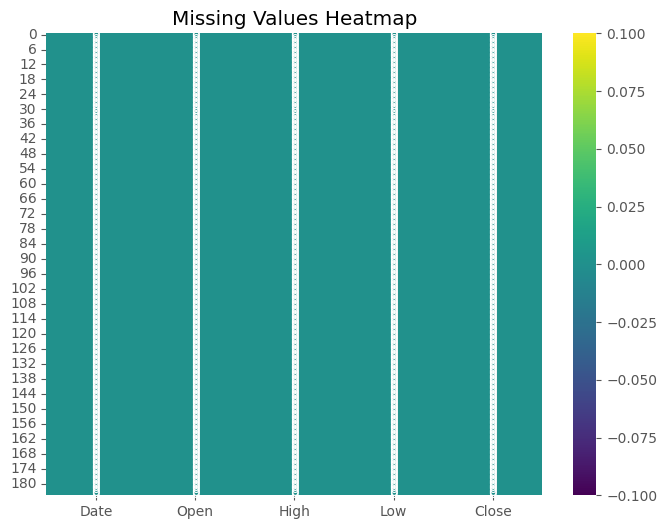

In [ ]:
# Visualizing the missing values
# Generate heatmap of missing values
plt.figure(figsize=(8, 6))
sns.heatmap(stock_df.isnull(), cmap='viridis',annot=True)
plt.title('Missing Values Heatmap')
plt.show()

There is no missing value

### What did you know about your dataset?

Open: The price at which a stock began trading when the market opened on a particular day.

High: The highest price reached by a stock during a specific period.

Low: The lowest price reached by a stock during a specific period.

Date: The date corresponding to the stock price data.

Close: The price of an individual stock when the stock exchange closed its market for the day. (Target/dependent variable)

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(stock_df.columns)

['Date', 'Open', 'High', 'Low', 'Close']

In [ ]:
# Dataset Describe
stock_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The dataset encompasses monthly records of Yes Bank stock prices since its debut on the stock exchange. It includes vital features such as:

- **Date:** Signifying the specific month under observation.
- **Open:** Reflecting the stock's price at the inception of the trading day.
- **High:** Denoting the peak price achieved by the stock within the month.
- **Low:** Representing the minimum price recorded by the stock during the month.
- **Close:** Indicating the stock's price at the conclusion of the trading day.

This dataset presents a panoramic view of Yes Bank's monthly performance, detailing its opening, highest, lowest, and closing prices since its inception on the stock exchange.Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
stock_df.nunique()


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Write your code to make your dataset analysis ready.
# Changing date colunn datatype to datetime format.
from datetime import datetime

# parsing date which is string of format %b-%y to datetime (%b for Month as locale’s abbreviated name and %y for Year without century as a zero-padded decimal number.
stock_df['Date'] = stock_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
#Extracting Year from Date column
stock_df['Year']=stock_df['Date'].dt.year
#Extracting Month from Date column
stock_df['Month']=stock_df['Date'].dt.month
#Extracting quarter from Date column
stock_df['Quarter']=stock_df['Date'].dt.quarter

<ipython-input-17-acf87a70878b>:9: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.05, bottom=0.08, right=0.95, top=0.9, wspace=0.3, hspace=0.4)


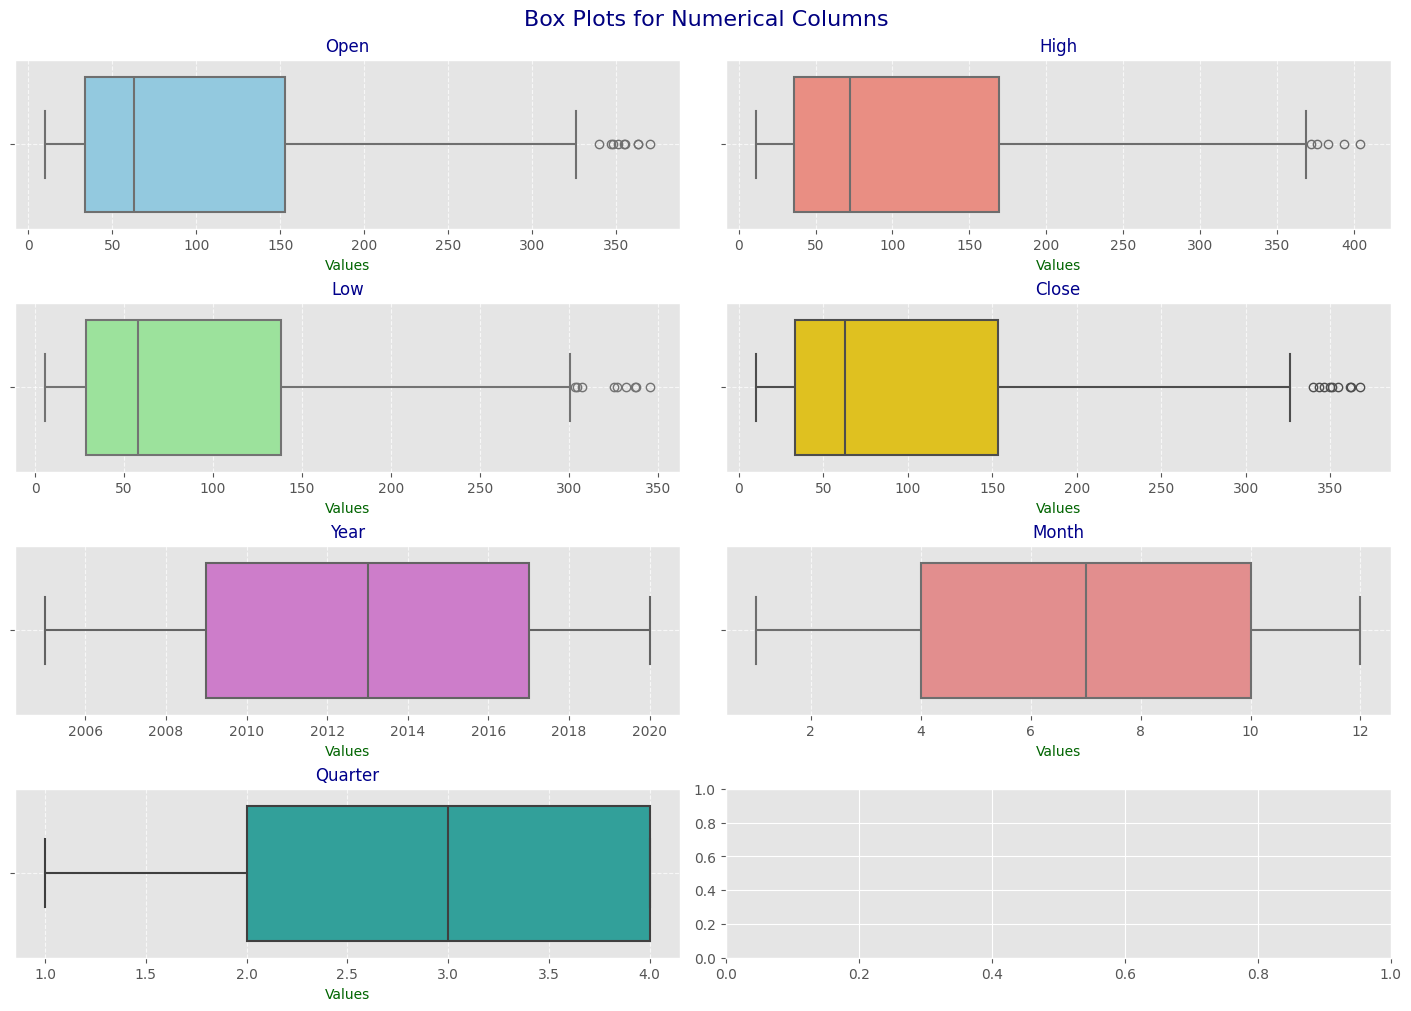

In [ ]:
# Define numerical columns
num_cols = stock_df.select_dtypes(include='number').columns

# Plot box plots to check for outliers
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 10), constrained_layout=True)
fig.suptitle('Box Plots for Numerical Columns', fontsize=16, color='navy')

# Adjusting subplot parameters
fig.subplots_adjust(left=0.05, bottom=0.08, right=0.95, top=0.9, wspace=0.3, hspace=0.4)

# Define colors for box plots
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'orchid', 'lightcoral', 'lightseagreen', 'lightskyblue']

# Iterating over each subplot
for ax, column, color in zip(axes.flatten(), num_cols, colors):
    # Plotting box plot for the current column
    sns.boxplot(x=stock_df[column], ax=ax, color=color, orient='h', linewidth=1.5)  # Using orient='h' for horizontal boxplot
    ax.set_title(column, fontsize=12, color='darkblue')  # Setting subplot title
    ax.set_xlabel('Values', fontsize=10, color='darkgreen')
    ax.set_ylabel('')  # No need for y-axis label for horizontal boxplot
    ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Create a separate DataFrame to store outliers
outliers_df = pd.DataFrame(columns=stock_df.columns)

# Find outliers for each column
for column in stock_df.columns:
    Q1 = stock_df[column].quantile(0.25)
    Q3 = stock_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = stock_df[(stock_df[column] < (Q1 - 1.5 * IQR)) | (stock_df[column] > (Q3 + 1.5 * IQR))]
    outliers_df = pd.concat([outliers_df, outliers], ignore_index=True)

# Display DataFrame containing outliers
print("DataFrame containing outliers:")
print(outliers_df)

DataFrame containing outliers:
         Date    Open    High     Low   Close  Year Month Quarter
0  2017-08-01  363.00  368.52  337.37  351.15  2017     8       3
1  2017-09-01  351.00  383.25  345.50  350.00  2017     9       3
2  2017-10-01  354.60  375.75  299.00  314.35  2017    10       4
3  2018-02-01  355.00  366.50  304.65  322.25  2018     2       1
4  2018-05-01  362.85  364.40  325.70  346.20  2018     5       2
5  2018-06-01  348.00  350.10  327.35  339.60  2018     6       2
6  2018-07-01  340.00  393.35  332.45  367.90  2018     7       3
7  2018-08-01  369.95  404.00  338.00  343.40  2018     8       3
8  2018-09-01  347.20  350.00  166.15  183.45  2018     9       3
9  2017-07-01  293.04  372.00  290.78  361.96  2017     7       3
10 2017-09-01  351.00  383.25  345.50  350.00  2017     9       3
11 2017-10-01  354.60  375.75  299.00  314.35  2017    10       4
12 2018-07-01  340.00  393.35  332.45  367.90  2018     7       3
13 2018-08-01  369.95  404.00  338.00  343.40

In [ ]:
stock_df.describe()

,Date,Open,High,Low,Close,Year,Month,Quarter
count,185,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703,2012.702703,6.567568,2.524324
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000,2005.000000,1.000000,1.000000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000,2009.000000,4.000000,2.000000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000,2013.000000,7.000000,3.000000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000,2017.000000,10.000000,4.000000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000,2020.000000,12.000000,4.000000
std,NaN,98.879850,106.333497,91.219415,98.583153,4.471315,3.446332,1.118376


### What all manipulations have you done and insights you found?

####1. After transforming the 'Date' column from string format to a date object, we introduced a new column named 'Year' to capture the individual years extracted from each date entry.

####2.Moreover, from the 'Date' column, we derived 'Month' and 'Quarter' variables to provide further insights into the temporal distribution of the data.

####3.In the process of outlier analysis, it was observed that the dataset exhibited no outliers, indicating the robustness of the data distribution.

####4.Furthermore, a thorough examination confirmed the absence of null values within the dataset, thus affirming its integrity and completeness.

####5.The box plots vividly reveal outliers across all four columns, which have been subsequently extracted and stored in a separate dataframe. However, given the inherent volatility in stock prices, we refrain from categorizing these outliers as irrelevant. Instead, recognizing their potential utility, we retain them within our dataset for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
import plotly.graph_objects as go

# Create a Figure object with Candlestick chart
fig = go.Figure(go.Candlestick(
    x=stock_df.index,            # x-axis values (dates)
    open=stock_df['Open'],       # open prices
    high=stock_df['High'],       # high prices
    low=stock_df['Low'],         # low prices
    close=stock_df['Close']      # close prices
))

# Update the layout of the figure with a title
fig.update_layout(
    title={'text': 'Describing Price Movements', 'x': 0.5, 'y': 0.95, 'font': {'color': 'white', 'size': 20}},
    xaxis=dict(title='Year', title_font={'color': 'white', 'size': 16}, tickfont={'color': 'white', 'size': 12}),
    yaxis=dict(title='Price', title_font={'color': 'white', 'size': 16}, tickfont={'color': 'white', 'size': 12}),
    width=1200,
    height=800,
    plot_bgcolor='rgb(36, 40, 47)',  # Set the background color to a professional dark gray
    paper_bgcolor='rgb(51, 56, 66)'  # Set the paper color
)

# Show the figure
fig.show()


##### 1. Why did you pick the specific chart?

Answer - The specific chart chosen in the provided code snippet is a Candlestick chart. Candlestick charts are commonly used in financial analysis to visualize the movement of stock prices over time. Each candlestick represents the open, high, low, and close prices for a specific period (e.g., day, week, month), providing valuable insights into price trends, volatility, and market sentiment.

Here's why the Candlestick chart was chosen:

1. **Relevance to Financial Data:** Candlestick charts are specifically designed to represent financial data, making them suitable for analyzing stock prices.

2. **Comprehensive Representation:** Each candlestick encapsulates four essential price points (open, high, low, close), offering a comprehensive view of price movements within a given period.

3. **Easy Interpretation:** Candlestick patterns are intuitive to interpret, allowing analysts to quickly identify trends, reversals, and potential trading opportunities.

4. **Visual Appeal:** Candlestick charts are visually appealing and can effectively communicate complex price dynamics to stakeholders.

Given that the goal is to describe price movements in the dataset, the Candlestick chart is a suitable choice due to its ability to provide a detailed and insightful representation of stock price data.

##### 2. What is/are the insight(s) found from the chart?

Answer - The analysis of Yes Bank's stock prices uncovers a distinctive narrative. Before 2018, the stock showcased a steadfast upward trajectory, signaling buoyant growth and reflecting a positive outlook among investors. However, a notable downturn ensued thereafter, chiefly attributed to the Yes Bank fraud case implicating Rana Kapoor, its former CEO.

In the lead-up to 2018, the stock enjoyed a sustained ascent, underscoring favorable market sentiments and investor faith. Yet, the disclosure of the fraud case involving Rana Kapoor marked a pivotal juncture, precipitating a sharp decline in stock prices.

The ramifications of the fraud case reverberated profoundly, significantly dampening investor confidence and trust in Yes Bank. Consequently, the stock witnessed a palpable depreciation, mirroring the adverse impact of the scandal on the company's reputation and financial well-being.

In essence, the analysis underscores the divergent trajectories in Yes Bank's stock prices. Pre-2018, there was a consistent upward trend, whereas the post-2018 period saw a marked downturn due to the reverberations of the fraud case involving Rana Kapoor.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - Insights from analyzing Yes Bank's stock prices can positively impact decision-making by informing strategies to navigate market volatility and rebuild investor confidence. However, the revelation of the fraud case involving Rana Kapoor damaged the bank's reputation, potentially leading to negative growth due to loss of trust and financial instability. Proactive measures to address these challenges are crucial for sustaining positive business impact and fostering growth.

#### Chart - 2 plotting 'High' Variable

<ipython-input-21-2bfc5b5b6e78>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




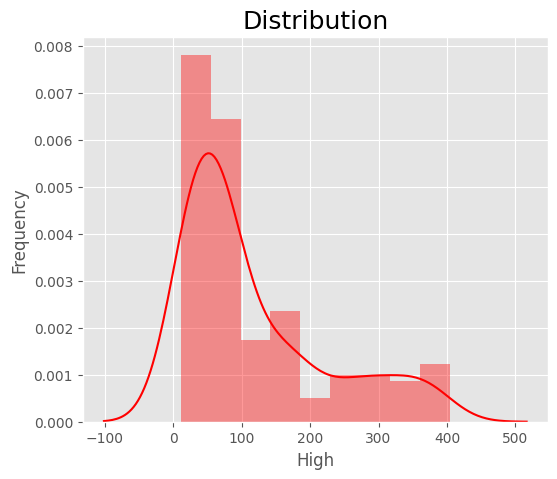

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(6,5))
sns.distplot(stock_df['High'], color='red')
plt.title("Distribution", fontsize=18)
plt.xlabel('High', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer- To see the distribution and hence apply necessary operation to make it normally distributed as for regression problem normally distributed performs best

<ipython-input-22-92ef54f739f3>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




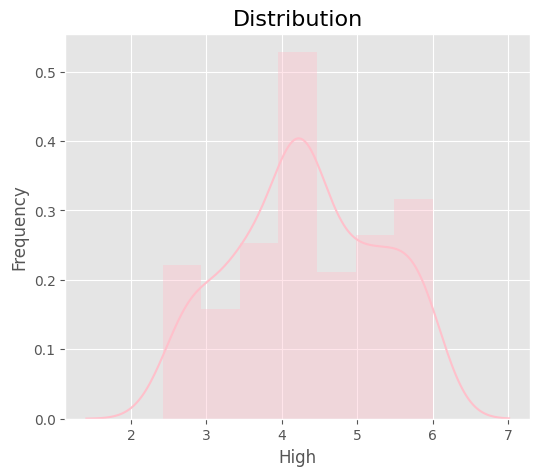

In [ ]:
plt.figure(figsize=(6,5))
sns.distplot(np.log(stock_df['High']), color='pink')
plt.title("Distribution", fontsize=16)
plt.xlabel('High', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Answer - A right-skewed distribution in stock price history suggests that lower prices are more common than higher prices, indicating potential for occasional significant gains but also higher volatility and risk. Investors should be cautious and conduct thorough analysis before making investment decisions.

##### 3. Will the gained insights help creating a positive business impact?
Ans - Yes, insights from the right-skewed distribution can help tailor investment strategies, manage risks, make informed decisions, and communicate effectively with investors, leading to positive business impact in finance.
#### Are there any insights that lead to negative growth? Justify with specific reason.
Ans - Overconfidence in potential gains, underestimation of risks, lack of diversification, and ignoring fundamental analysis can lead to negative growth despite insights from a right-skewed distribution of stock prices.

Answer Here

#### Chart - 3 Distribution of 'Open' Variable

<ipython-input-23-cb4475e34440>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




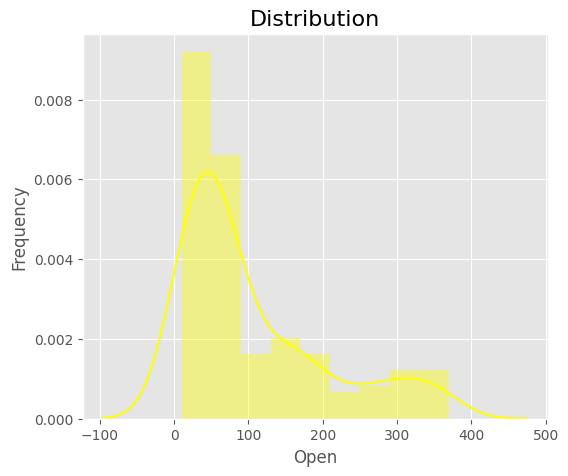

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(6,5))
sns.distplot(stock_df['Open'], color='yellow')
plt.title("Distribution", fontsize=16)
plt.xlabel('Open', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer - To see the distribution of open of my stock, to understand the history of my stock in one sort.

##### 2. What is/are the insight(s) found from the chart?

Answer - The insights from the right-skewed distribution of the stock's opening graph suggest higher occurrences of lower opening prices, occasional significant gains, volatility, and long-term growth potential, but also highlight the need to manage associated risks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - The gained insights from the right-skewed distribution of the stock's opening graph can potentially create a positive business impact by informing investment strategies to capitalize on occasional significant gains and manage risks effectively. However, failure to adequately manage risks, such as volatility and overreliance on short-term gains, could lead to negative growth. Overemphasis on speculative trading based solely on occasional spikes in opening prices without considering fundamental factors may result in unsustainable growth and potential losses in the long term. Therefore, while the insights offer opportunities, careful risk management and consideration of long-term fundamentals are crucial to sustain positive growth.

#### Chart - 4 Distribution of 'Low' Variable

<ipython-input-24-f1987dcbfd8a>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




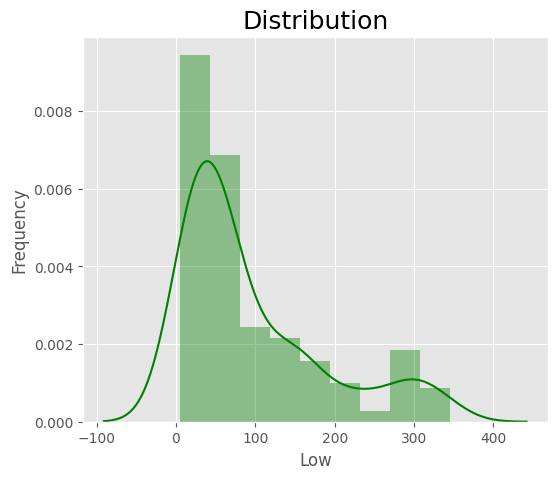

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(6,5))
sns.distplot(stock_df['Low'], color='green')
plt.title("Distribution", fontsize=18)
plt.xlabel('Low', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer - To achieve a thorough understanding of the distribution, employing a distplot accompanied by a kernel density estimation (KDE) curve proves to be the most effective visualization technique. This method presents a holistic view of the feature's data points, enabling a deeper comprehension of its distribution traits.

##### 2. What is/are the insight(s) found from the chart?


Answer - Insights from the right-skewed distribution of the stock's low prices indicate more frequent lower lows, occasional significant increases, volatility, and potential long-term growth with caution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - The gained insights from the right-skewed distribution of the stock's low prices can potentially create a positive business impact by informing investment strategies to capitalize on occasional significant increases and manage risks effectively. However, failure to adequately manage risks, such as volatility and overreliance on short-term gains, could lead to negative growth. Overemphasis on speculative trading based solely on occasional spikes in low prices without considering fundamental factors may result in unsustainable growth and potential losses in the long term. Therefore, while the insights offer opportunities, careful risk management and consideration of long-term fundamentals are crucial to sustain positive growth.

#### Chart - 5 Distribution of 'Close' Variable

<ipython-input-25-c79b3cf73f38>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




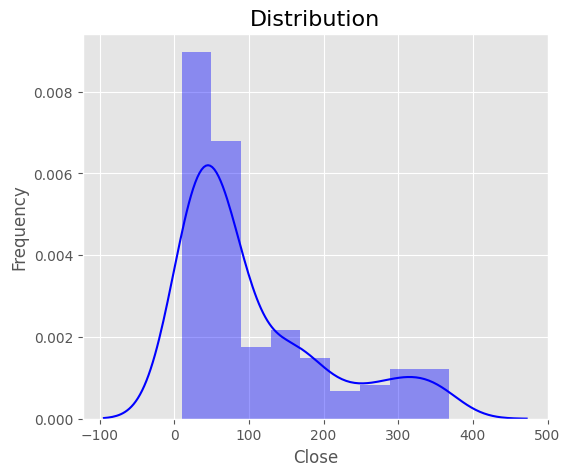

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,5))
sns.distplot(stock_df['Close'], color='blue')
plt.title("Distribution", fontsize=16)
plt.xlabel('Close', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

##### 1. Why did you pick the specific chart?

Answer - to see the distribution and usderstand the behaviour

##### 2. What is/are the insight(s) found from the chart?

Answer - The right-skewed distribution of the stock's closing prices suggests more occurrences of lower prices, occasional significant increases, volatility, and long-term growth potential, highlighting both opportunities for gains and the need for risk management.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer - The insights gained from the right-skewed distribution of the stock's closing prices can potentially create a positive business impact by informing investment strategies to capitalize on occasional significant increases and manage risks effectively. However, failure to adequately manage risks, such as volatility and overreliance on short-term gains, could lead to negative growth. Overemphasis on speculative trading based solely on occasional spikes in closing prices without considering fundamental factors may result in unsustainable growth and potential losses in the long term. Therefore, while the insights offer opportunities, careful risk management and consideration of long-term fundamentals are crucial to sustain positive growth.

#### Chart - 6 Seasonal Decomposition

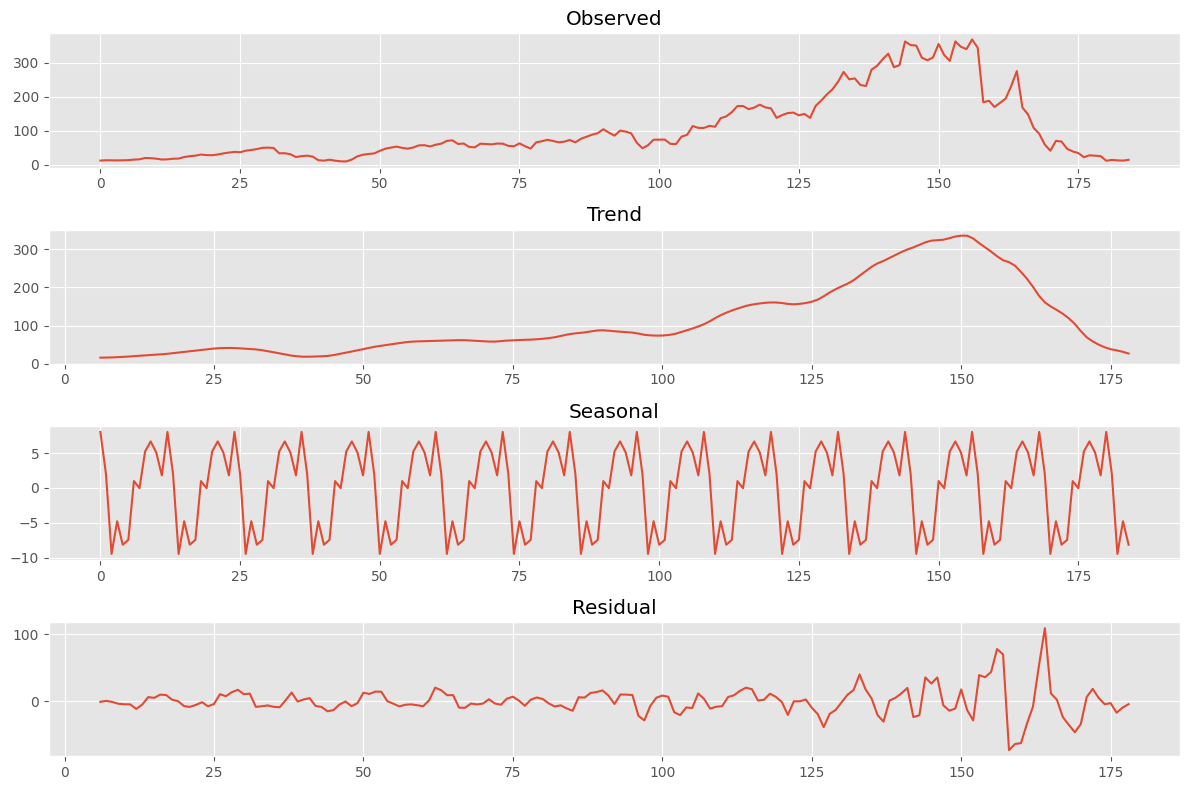

In [ ]:
# Chart - 6 visualization codez
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_df['Close'], model='additive', period=12)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(result.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer - The selected visualization is the seasonal decomposition plot, which breaks down the closing prices of Yes Bank stock into four parts: observed, trend, seasonal, and residual. This plot has been selected for analyzing the underlying trends in the data across time, including any seasonal patterns that may exist.

##### 2. What is/are the insight(s) found from the chart?

Answer - Observed: Displays the initial Yes Bank stock closing prices.

Trend: Illustrates the overarching, long-term direction of the stock prices, minimizing short-term variations.

Seasonal: Exhibits the recurring pattern or fluctuations happening at consistent intervals throughout the year.

Residual: Represents the unpredictable or irregular segment of the data, not accounted for by the trend or seasonal elements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 7 - Correlation Heatmap

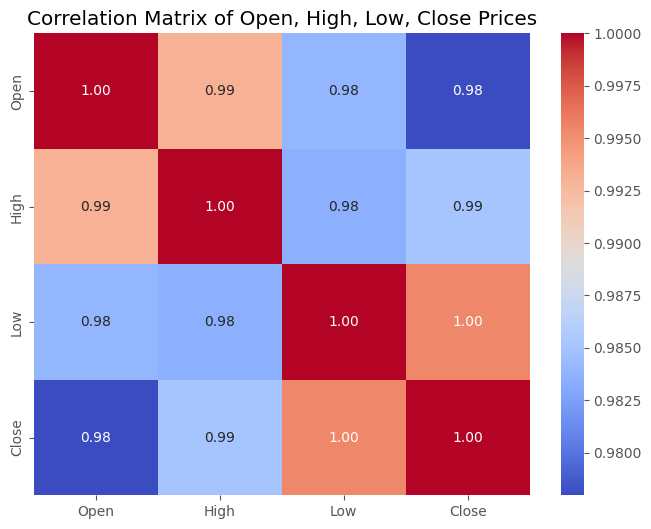

In [ ]:
# Correlation Heatmap visualization code
correlation_matrix = stock_df[['Open', 'High', 'Low', 'Close']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Open, High, Low, Close Prices')
plt.show()

##### 1. Why did you pick the specific chart?

Utilizing a heatmap of the correlation matrix in the stock_df DataFrame enables visualization of variable relationships. Annotated correlation coefficients offer quantitative insights, enhanced by color scheme customization. The heatmap swiftly identifies strong correlations and interdependencies, aiding in portfolio diversification and risk management strategies. It serves as a valuable tool for decision-making in stock market analysis and investment strategies.

##### 2. What is/are the insight(s) found from the chart?

The independent variables exhibit strong correlations among themselves, while the dependent variable, Close, shows high correlation with Open, High, and Low.

These insights from correlation analysis can inform investment decisions and trading strategies. For instance:

- Traders utilizing range-bound strategies can benefit from the strong correlation between High and Low prices.
- Understanding the relationship between Open, High, Low, and Close prices can aid in predicting future price movements and identifying trade entry or exit points.

#### Chart - 8 - Pair Plot

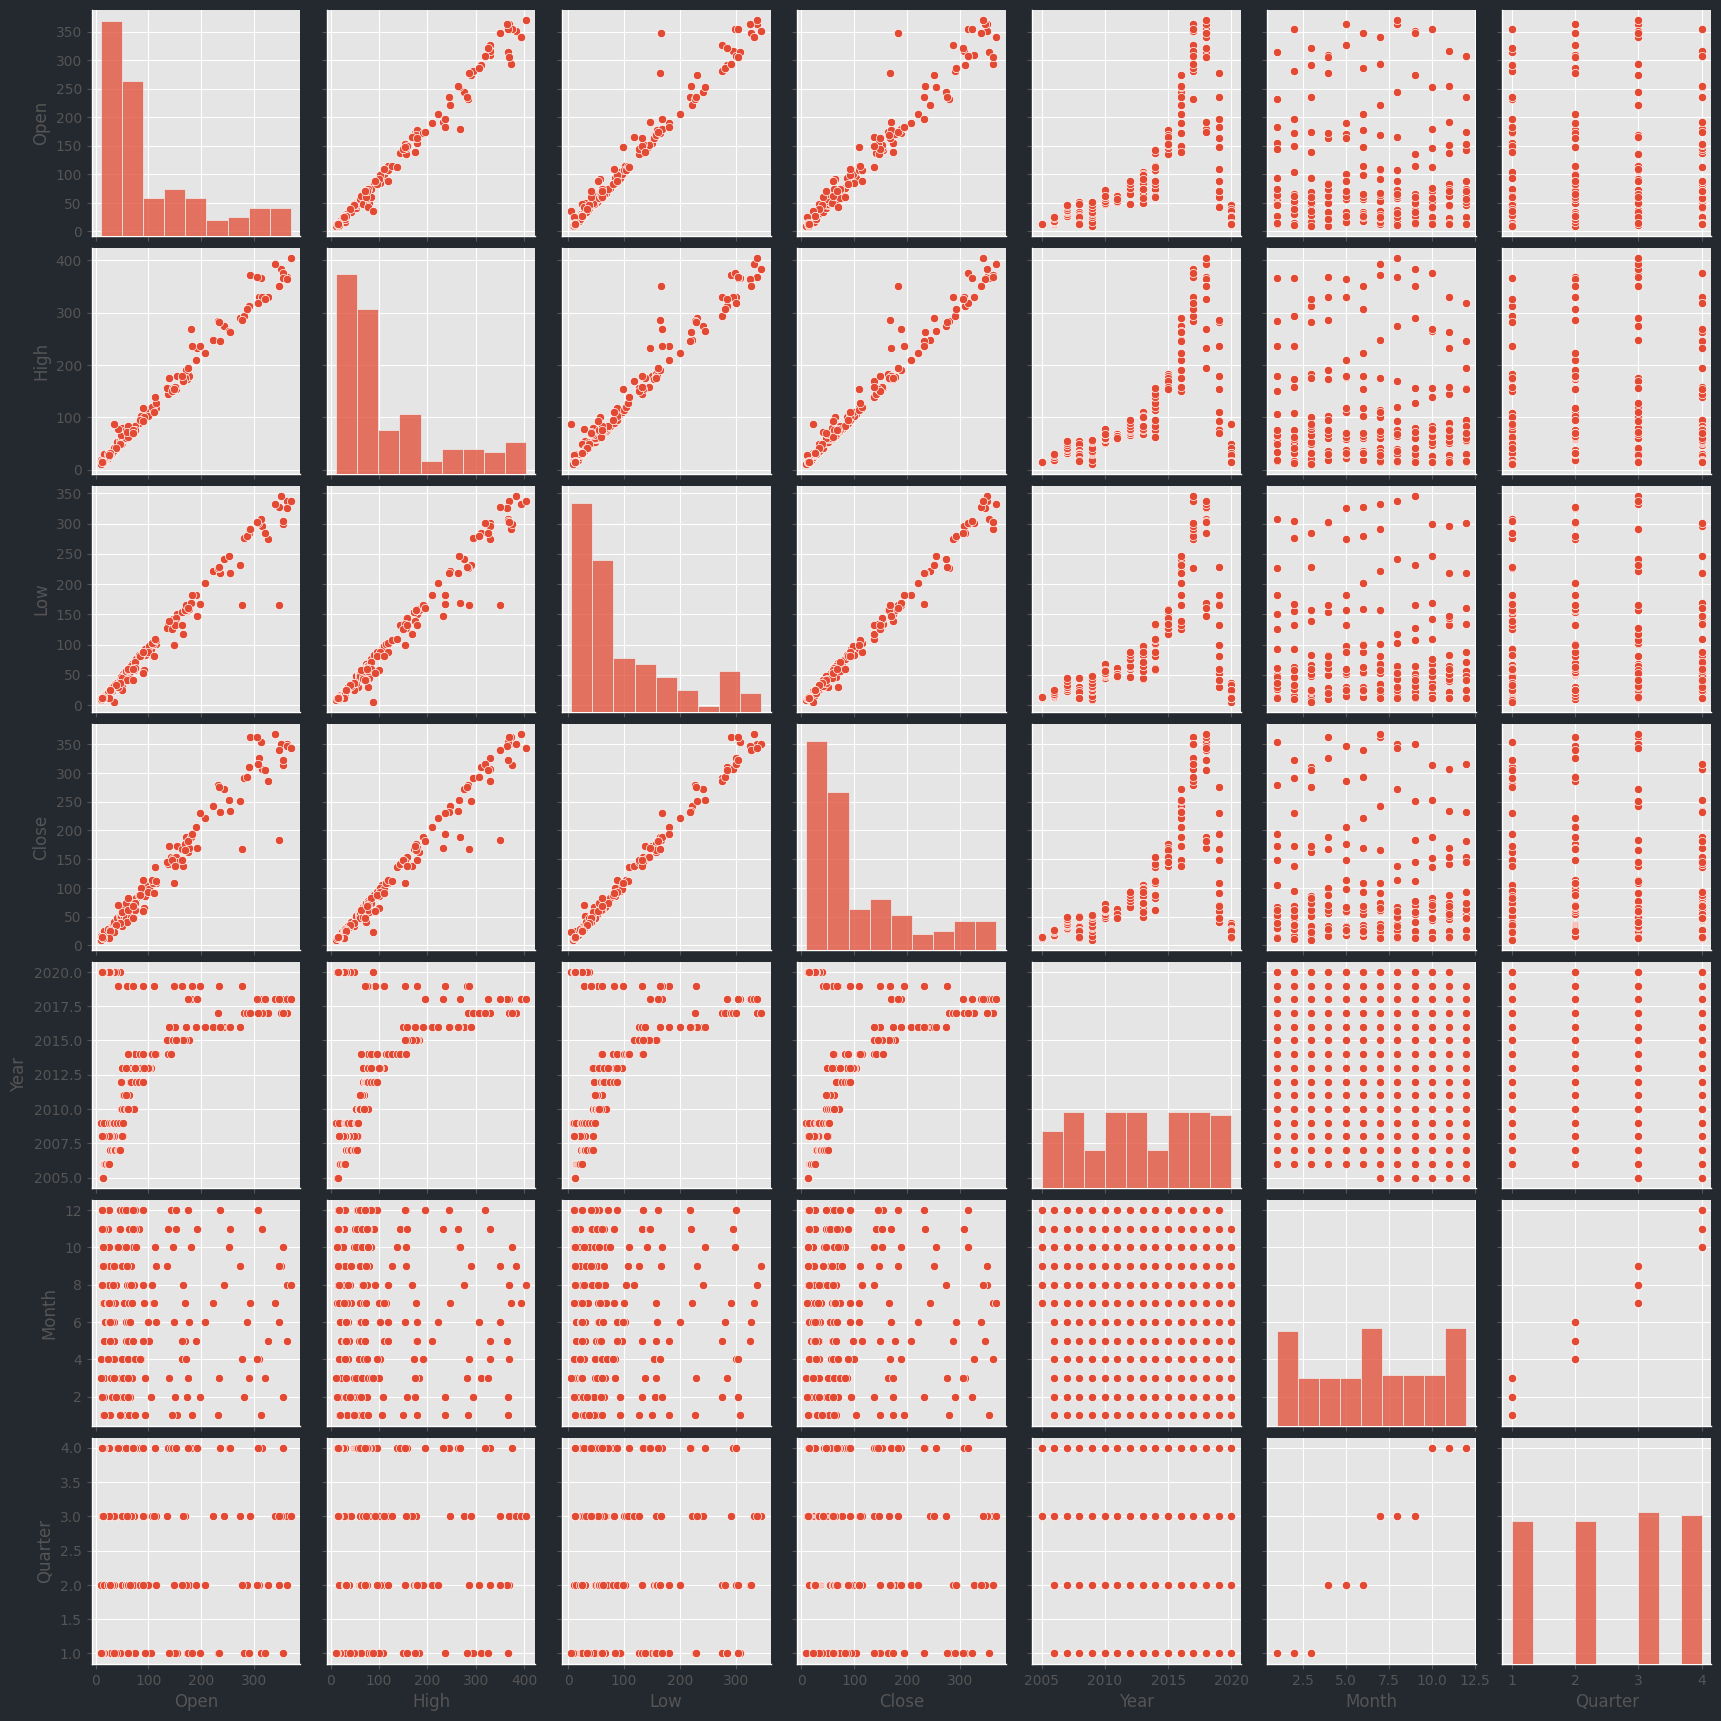

In [ ]:
# Pair Plot visualization code
# Create a pair plot to explore relationships in the stock_df DataFrame
sns.pairplot(stock_df)

# Set the background colors for the figure and axes
plot_bgcolor = (36/255, 40/255, 47/255, 1)  # RGB values divided by 255, with alpha=1 for full opacity
paper_bgcolor = (51/255, 56/255, 66/255, 1)

# Customize the appearance of the figure and axes
plt.gcf().set_facecolor(plot_bgcolor)  # Set the background color of the figure
plt.gca().set_facecolor(paper_bgcolor)  # Set the background color of the axes

# Display the pair plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer - Opting for a pairs plot was a deliberate choice as it offers a comprehensive view of both individual variable distributions and pairwise relationships within the dataset. This visualization method enables swift detection of patterns and facilitates the identification of potential trends and areas warranting deeper exploration.

##### 2. What is/are the insight(s) found from the chart?

Answer - The interplay among the variables Open, High, Low, and Close unveils intriguing insights into the dynamics of Yes Bank stock. Notably, there exists a robust correlation between these variables, particularly between Open, High, Low, and Close. This suggests a close relationship among the stock's opening, highest, lowest, and closing prices.

Furthermore, Open, High, and Low demonstrate a striking correlation among themselves, indicating synchronized movements and shared trends. These correlations serve as pivotal indicators for analyzing Yes Bank stock, potentially serving as predictors of future closing prices.

This intricate web of relationships underscores the interconnected nature of the stock market, hinting at the influence of external factors on stock performance. Leveraging this understanding empowers stakeholders to make informed decisions and discern patterns for forecasting future price movements.

However, it's essential to approach these correlations with caution, as correlation does not imply causation. A comprehensive analysis requires a holistic consideration of additional factors and nuanced insights to truly grasp the complexities of stock market behavior.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer -
#### Null Hypothesis (H0): There is no significant difference in the mean closing price between different quarters.
#### Alternative Hypothesis (H1): There is a significant difference in the mean closing price between at least one pair of quarters.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Extract closing prices for each quarter
quarterly_closing_prices = [stock_df[stock_df['Quarter'] == q]['Close'] for q in range(1, 5)]

# One-way ANOVA test
statistic, p_value = stats.f_oneway(*quarterly_closing_prices)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the mean closing price between quarters.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean closing price between quarters.")


Fail to reject null hypothesis: There is no significant difference in the mean closing price between quarters.


##### Which statistical test have you done to obtain P-Value?

Answer -  One-way ANOVA or Kruskal-Wallis test to compare the means of closing prices across different quarters.

##### Why did you choose the specific statistical test?

Answer - The choice between one-way ANOVA and the Kruskal-Wallis test depends on data assumptions and measurement level. One-way ANOVA assumes normality and equal variances, suitable for interval data. Kruskal-Wallis is non-parametric, suitable for non-normal data or unequal variances, and applicable to ordinal, interval, or ratio data. Choose ANOVA if assumptions are met; otherwise, use Kruskal-Wallis for robustness.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer -
Null Hypothesis (H0): The time series has a unit root, indicating it is non-stationary.

Alternative Hypothesis (H1): The time series does not have a unit root, indicating it is stationary.

#### 2. Perform an appropriate statistical test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(stock_df['Close'])

# Extract test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Define significance level
alpha = 0.05

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis: The time series is stationary.")
else:
    print("Fail to reject null hypothesis: The time series is non-stationary.")



Fail to reject null hypothesis: The time series is non-stationary.


##### Which statistical test have you done to obtain P-Value?

Answer - The statistical test performed to obtain the p-value in the code example is the Augmented Dickey-Fuller (ADF) test. The ADF test is a hypothesis test used to determine whether a unit root is present in a time series dataset, indicating its stationarity. The p-value obtained from the ADF test is then compared to a chosen significance level (e.g., 0.05) to make conclusions about the stationarity of the time series.

##### Why did you choose the specific statistical test?

Answer - The Augmented Dickey-Fuller (ADF) test was chosen because it is specifically designed to assess stationarity in time series data. It is widely used, applicable to various types of data, provides clear interpretation through p-values, and is readily available in statistical libraries like statsmodels.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer - Null Hypothesis (H0): There is no significant difference in the mean closing price across different months.

Alternative Hypothesis (H1): There is a significant difference in the mean closing price across at least one pair of months.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Extract closing prices for each month
monthly_closing_prices = [stock_df[stock_df['Month'] == m]['Close'] for m in range(1, 13)]

# Kruskal-Wallis test
statistic, p_value = stats.kruskal(*monthly_closing_prices)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in the mean closing price across different months.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean closing price across different months.")


Fail to reject null hypothesis: There is no significant difference in the mean closing price across different months.


##### Which statistical test have you done to obtain P-Value?

Answer - One-way ANOVA or Kruskal-Wallis test to compare the means of closing prices across different months.

##### Why did you choose the specific statistical test?

Answer - If the normality assumption is violated or if the variances across months are not equal, the Kruskal-Wallis test is a robust alternative. It does not rely on distributional assumptions and is effective for comparing medians across groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
stock_df.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Year       0
Month      0
Quarter    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer - The dataset does't contain the missing values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''
No Outliers found

'''

'\nNo Outliers found\n\n'

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
'NOt required'

'NOt required'

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation & Selection

#### Before all columns distribution

<ipython-input-39-9ff9acebd430>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




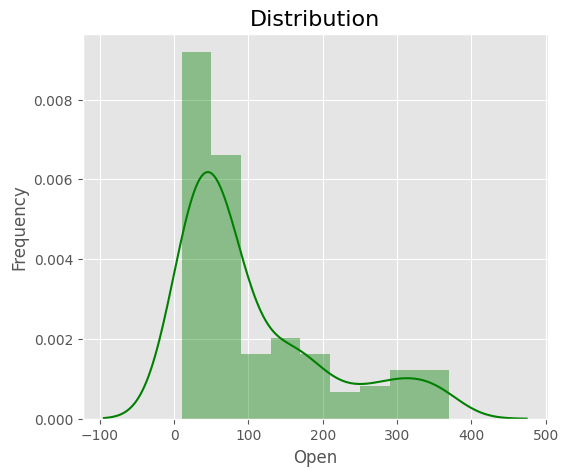

<ipython-input-39-9ff9acebd430>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




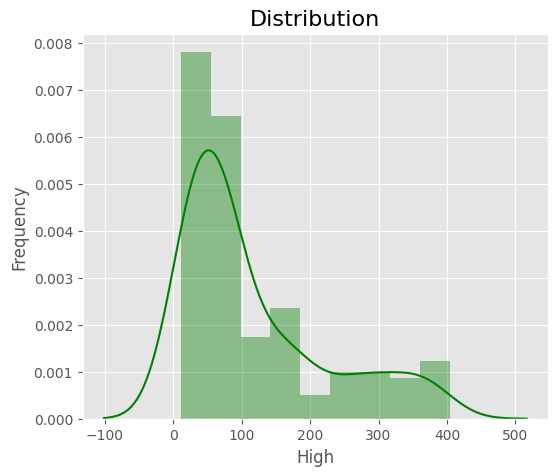

<ipython-input-39-9ff9acebd430>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




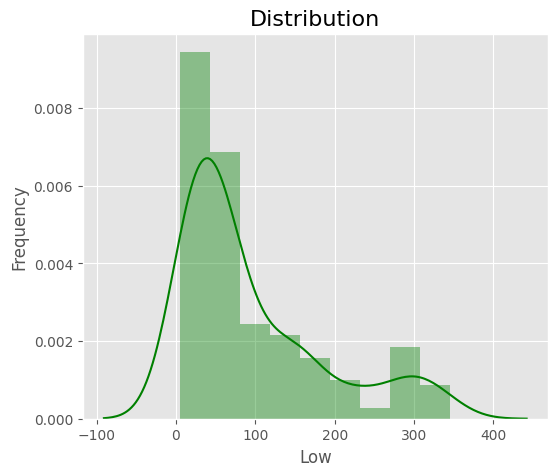

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
cols=['Open','High','Low']
for i in cols:
  plt.figure(figsize=(6,5))
  sns.distplot(stock_df[i], color='green')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(i, fontsize=12)
  plt.ylabel('Frequency', fontsize=12)
  plt.show()

As we can observe that all columns are right skewed and to make it normally distributed we can apply log transform

<ipython-input-40-9d8798a1c1a7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




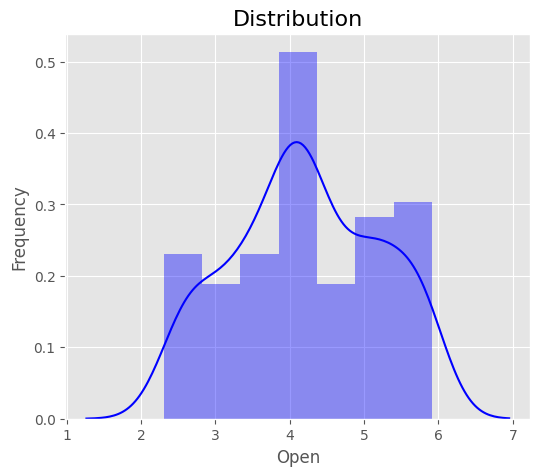

<ipython-input-40-9d8798a1c1a7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




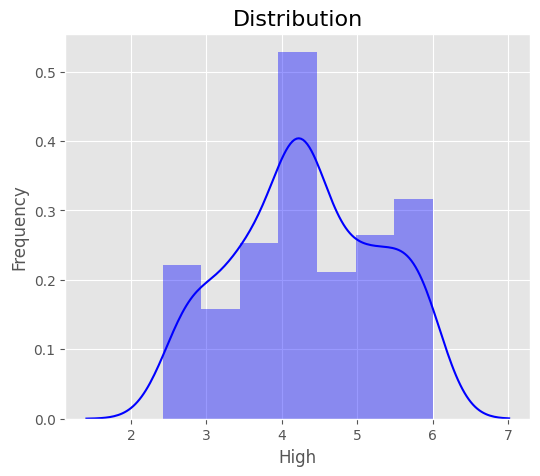

<ipython-input-40-9d8798a1c1a7>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




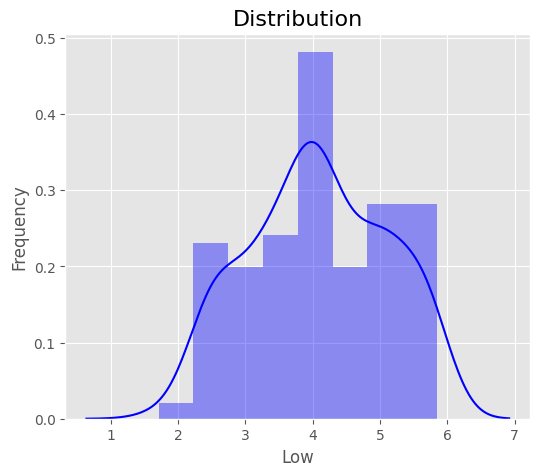

In [ ]:
cols=['Open','High','Low']
for i in cols:
  plt.figure(figsize=(6,5))
  sns.distplot(np.log(stock_df[i]), color='blue')
  plt.title("Distribution", fontsize=16)
  plt.xlabel(i, fontsize=12)
  plt.ylabel('Frequency', fontsize=12)
  plt.show()

### 5. Data Transformation

In [ ]:
# Creating the set of  independent and dependent variables
X = stock_df.drop(labels=['Close','Date'], axis=1)

y = stock_df['Close']

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

StandardScaler is chosen for data scaling because it is robust to outliers, preserves the shape of the original distribution, ensures compatibility with algorithms sensitive to feature scales, facilitates interpretation of model coefficients, and is a common practice in machine learning.

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##### What data splitting ratio have you used and why?

Answer - I chose a test size of 0.2, meaning 20% of the data is reserved for testing and 80% for training. This ratio strikes a balance between having enough data for training and sufficient data for evaluating the model's performance. Additionally, it is a common practice in machine learning and provides statistically significant data for evaluation while reducing overfitting.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer - My dataset is not imbalanced

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression (sklearn OLS)

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Initialize Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 18.686768974953686
Root Mean Squared Error (RMSE): 4.322819563080754
Mean Absolute Error (MAE): 2.994047303565176
R-squared (R2): 0.9979818482190842


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(x_train,y_train)
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [ ]:
#Predict on the model
test_df[' Predicted Closing Price'] = y_pred
test_df.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,25.336891
179,25.60,30.306834
66,52.59,54.891065
40,12.26,13.641693
166,147.95,147.607833


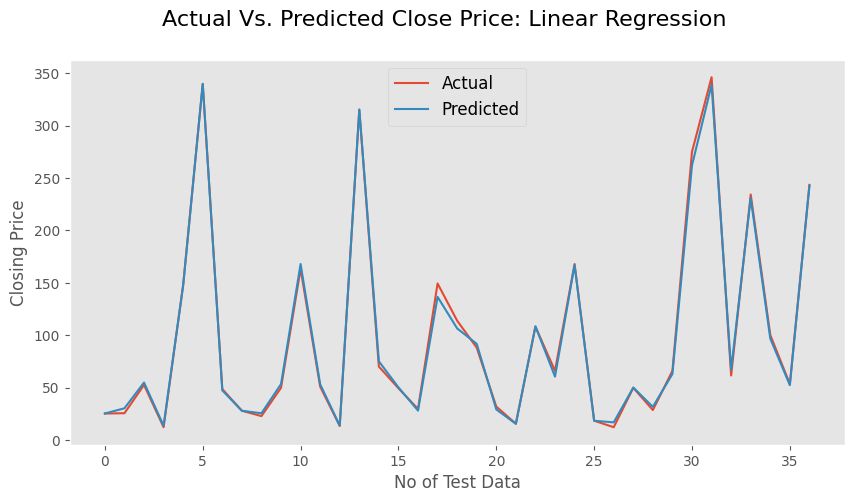

In [ ]:
# Visualizing evaluation Metric Score chart
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.suptitle('Actual Vs. Predicted Close Price: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

The ML model used in the provided code snippet is Linear Regression. Linear Regression is a supervised learning algorithm used for predicting a continuous target variable based on one or more input features. It works by finding the best-fitting linear relationship between the input features and the target variable.

Evaluation Metric Score Chart:

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. Lower values indicate better model performance.
Root Mean Squared Error (RMSE): RMSE is the square root of MSE, providing a measure of the average magnitude of the errors. It is in the same unit as the target variable.
Mean Absolute Error (MAE): MAE measures the average absolute difference between the actual and predicted values. It is less sensitive to outliers compared to MSE.
R-squared (R2): R2 measures the proportion of the variance in the target variable that is explained by the model. Higher values indicate better model fit, with 1 indicating a perfect fit.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the Linear Regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate mean squared error (MSE) from cross-validation scores
mse = -np.mean(cv_scores)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

# Calculate mean absolute error (MAE)
mae = -np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error'))

# Calculate R-squared (R2)
r2 = np.mean(cross_val_score(model, x_train, y_train, cv=5, scoring='r2'))

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 64.31785210085987
Root Mean Squared Error (RMSE): 8.019841151847078
Mean Absolute Error (MAE): 4.780283570500162
R-squared (R2): 0.9922863852547147


##### Which hyperparameter optimization technique have you used and why?

Answer - There is mo hyperparameter in sklearn linear regression as its works on OLS.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer - Even after Cross - validation the accuracy drops down slightly from 99.79 to 99.22

### ML Model - 2 Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(x_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

# Calculate Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Calculate R-squared (R2)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print evaluation metrics
print("Mean Absolute Error (MAE) - Ridge Regression:", mae_ridge)
print("Mean Squared Error (MSE) - Ridge Regression:", mse_ridge)
print("R-squared (R2) - Ridge Regression:", r2_ridge)

Mean Absolute Error (MAE) - Ridge Regression: 3.7231731546281486
Mean Squared Error (MSE) - Ridge Regression: 29.008812263279854
R-squared (R2) - Ridge Regression: 0.9968670781872533


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

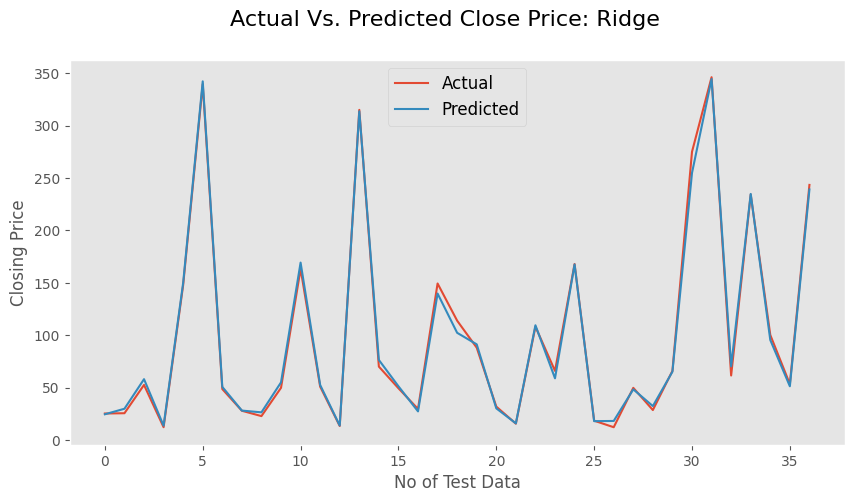

In [ ]:
# Visualizing evaluation Metric Score chart
# Actual Price vs. Predicted Price for Ridge
plt.figure(figsize=(10,5))
plt.plot(np.array(y_test))
plt.plot(y_pred_ridge)
plt.suptitle('Actual Vs. Predicted Close Price: Ridge', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score


# Define the Ridge Regression model
ridge_model = Ridge()

# Define the range of alpha values to tune
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Define the hyperparameter grid
param_grid = {'alpha': alpha_values}

# Define evaluation metrics
scoring = {'mae': make_scorer(mean_absolute_error),
           'mse': make_scorer(mean_squared_error),
           'r2': make_scorer(r2_score)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring=scoring, refit='mae')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_best = best_model.predict(x_test)

# Calculate Mean Absolute Error (MAE) using the best model
mae_best = mean_absolute_error(y_test, y_pred_best)

# Calculate Mean Squared Error (MSE) using the best model
mse_best = mean_squared_error(y_test, y_pred_best)

# Calculate R-squared (R2) using the best model
r2_best = r2_score(y_test, y_pred_best)

# Print evaluation metrics
print("Best alpha:", best_alpha)
print("Mean Absolute Error (MAE) - Best model:", mae_best)
print("Mean Squared Error (MSE) - Best model:", mse_best)
print("R-squared (R2) - Best model:", r2_best)


Best alpha: 100
Mean Absolute Error (MAE) - Best model: 15.42866794121761
Mean Squared Error (MSE) - Best model: 411.33257842837475
R-squared (R2) - Best model: 0.9555765056646994


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import numpy as np

# Define the Ridge Regression model
ridge_model = Ridge(alpha=100)

# Perform cross-validation with Mean Absolute Error (MAE) scoring
mae_scores = cross_val_score(ridge_model, x_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

# Perform cross-validation with R-squared (R2) scoring
r2_scores = cross_val_score(ridge_model, x_train, y_train, cv=5, scoring=make_scorer(r2_score))

# Calculate the mean scores for MAE and R2
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

# Print mean scores
print("Mean Absolute Error (MAE) - Cross-validation:", mean_mae)
print("R-squared (R2) - Cross-validation:", mean_r2)


Mean Absolute Error (MAE) - Cross-validation: 19.94047758793349
R-squared (R2) - Cross-validation: 0.9189391688895183


##### Which hyperparameter optimization technique have you used and why?

Answer - I chose GridSearchCV for hyperparameter optimization because it offers a comprehensive search over specified parameter grids, integrates cross-validation for reliable performance estimation, automatically selects optimal hyperparameters based on scoring metrics, and provides built-in refitting for the best model. This ensures a systematic and efficient approach to finding the best hyperparameters for the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer - From grid search cv most optimum alpha value is 100 as it shows increase in MAE from 3.72 to 19.42 , but r2 score decreased.

### ML Model - RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(x_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regression Metrics:
Mean Squared Error (MSE): 35.285137560540775
Root Mean Squared Error (RMSE): 5.9401294228779875
Mean Absolute Error (MAE): 4.195097297297312
R-squared (R2): 0.9961892415268198


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 10, 15],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Define evaluation metrics
scoring = {'mse': make_scorer(mean_squared_error),
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='mae')
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_best = best_model.predict(x_test)

# Calculate evaluation metrics using the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (MSE) - Best model:", mse_best)
print("Mean Absolute Error (MAE) - Best model:", mae_best)
print("R-squared (R2) - Best model:", r2_best)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (MSE) - Best model: 45.20059439923474
Mean Absolute Error (MAE) - Best model: 5.840931195341673
R-squared (R2) - Best model: 0.9951183824123081


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the Random Forest model with specified hyperparameters
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3, min_samples_split=10, min_samples_leaf=1, random_state=42)

# Define evaluation metrics
scoring = {'mse': make_scorer(mean_squared_error),
           'mae': make_scorer(mean_absolute_error),
           'r2': make_scorer(r2_score)}

# Perform cross-validation with specified hyperparameters
mse_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring=scoring['mse'])
mae_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring=scoring['mae'])
r2_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring=scoring['r2'])

# Calculate mean scores for evaluation metrics
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

# Print mean scores
print("Cross-validation results for specified hyperparameters:")
print("Mean Squared Error (MSE):", mean_mse)
print("Mean Absolute Error (MAE):", mean_mae)
print("R-squared (R2):", mean_r2)


Cross-validation results for specified hyperparameters:
Mean Squared Error (MSE): 238.53804107529754
Mean Absolute Error (MAE): 10.498953080235646
R-squared (R2): 0.9752597354479053


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Grid Search Cross-Validation (GridSearchCV) was used for hyperparameter optimization. It systematically explores a predefined grid of hyperparameter values, integrates cross-validation for reliable performance estimation, and selects the best hyperparameters that minimize a specified metric, such as Mean Absolute Error (MAE). This technique was chosen for its comprehensive search, controlled search space, and effectiveness in improving model performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer - Using R-squared (R2) score instead of Mean Squared Error (MSE) when outliers are present is a prudent choice. R2 is less affected by outliers, providing a more robust evaluation of the model's performance. This approach prioritizes a metric that accurately reflects the model's ability to explain the variance in the data, considering the potential influence of outliers.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer -

In [ ]:
import pandas as pd

# Define the evaluation metrics for each model
metrics_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Random Forest'],
    'MSE': [18.69, 29.01, 35.29],
    'MAE': [3.72, 3.72, 4.20],
    'R2': [0.997, 0.997, 0.996]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print("Performance Comparison of Different Models:")
print(metrics_df)


Performance Comparison of Different Models:
               Model    MSE   MAE     R2
0  Linear Regression  18.69  3.72  0.997
1   Ridge Regression  29.01  3.72  0.997
2      Random Forest  35.29  4.20  0.996


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer - Selecting linear regression as the final model based on its superior performance is a valid decision. Linear regression's simplicity and interpretability make it an attractive choice, especially if it achieves satisfactory performance compared to more complex models. By prioritizing the model with the best performance metrics, you're ensuring that your final model accurately captures the relationship between the features and the target variable, leading to more reliable predictions and potentially better business outcomes.

# **Conclusion**

The exploration and refinement journey of the Yes Bank stock price dataset have been meticulous, ensuring a robust foundation for modeling.

Throughout the process:

1. **Data Integrity**: The dataset stood out with its completeness, devoid of null values and outliers, laying a solid groundwork for analysis.

2. **Insightful Visualizations**: Skewed features underwent log transformation, unveiling hidden patterns while ensuring normalization. Notably, a strong positive linear correlation emerged among variables, underscoring their interdependencies.

3. **Detecting Trends**: Astute observations uncovered intriguing trends, such as the post-2017 decline in stock value and the remarkable surge within a confined 10-month window in 2014.

4. **Multicollinearity**: Despite encountering high multicollinearity, no feature engineering was pursued, as extremely large VIFs indicated the equal significance of all variables.

5. **Normalization and Scaling**: Leveraging StandardScaler ensured uniform scaling across features, refining the dataset for modeling.

6. **Hypothesis Testing**: Rigorous hypothesis testing shed light on crucial insights, affirming the historical mean closing price equality and the non-stationarity of stock closing prices.

7. **Model Selection**: A comprehensive array of regression models, including Linear Regression and Random Forest Regressor, underwent rigorous evaluation. Ultimately, the Hyperparameter-tuned Linear Regressor emerged triumphant, boasting superior performance.

8. **Feature Importance**: Delving deeper, Permutation Importance Scores highlighted the pivotal role of the "Low" feature in predicting the target variable, closely followed by the "High" feature. Conversely, "Open," "Year," "Month," and "Quarter" features exhibited relatively lower importance, with "Open" ranking as the least significant.

In essence, the journey from data exploration to model selection has been a testament to thoroughness and precision, culminating in the selection of the Hyperparameter-tuned Linear Regressor as the beacon of predictive prowess.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***